## Load data and import used libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

dataset=pd.read_csv('BearingVibration_Dataset.csv')

In [4]:
dataset.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


In [5]:
dataset = dataset.rename(columns={'Unnamed: 0':'date'})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       982 non-null    object 
 1   Bearing 1  982 non-null    float64
 2   Bearing 2  982 non-null    float64
 3   Bearing 3  982 non-null    float64
 4   Bearing 4  982 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.5+ KB


In [6]:
#Null data check
dataset.isnull().sum()

date         0
Bearing 1    0
Bearing 2    0
Bearing 3    0
Bearing 4    0
dtype: int64

In [7]:
dataset.shape

(982, 5)

After calling the data and viewing the data information, it can be seen that:

- The data to be used consists of 982 rows and 5 columns.
- No null value in data.
- One column has object data type and 4 data columns have float type.

## Data Preparation

Convert the data type of date column to datetime format and set date column as index for dataset

In [8]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset.set_index('date', inplace=True)

## Exploratory Data Analysis (EDA)

In [9]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Bearing 1,982.0,0.080951,0.040200,0.001168,0.060773,0.062021,0.083277,0.453335
Bearing 2,982.0,0.078543,0.011789,0.000767,0.074240,0.075206,0.077458,0.161016
Bearing 3,982.0,0.081351,0.011607,0.000716,0.076829,0.078187,0.080575,0.151299
Bearing 4,982.0,0.047830,0.009549,0.001699,0.043951,0.044524,0.048130,0.119047


C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Luqman\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will r

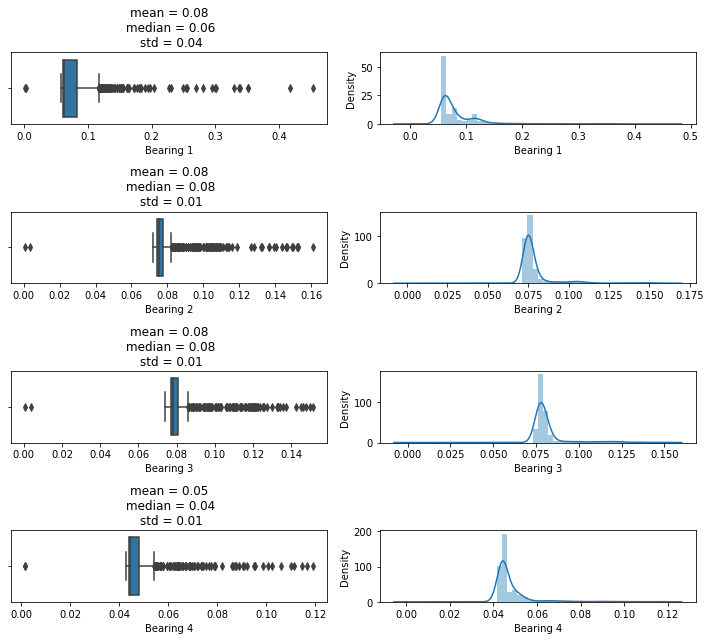

In [10]:
# Building a function to create a Plot for numeric data
def observasi_num(features):
    fig, axs = plt.subplots(4, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        sns.boxplot(dataset[kol], ax = axs[i][0])
        sns.distplot(dataset[kol], ax = axs[i][1])
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(dataset[kol].mean(), dataset[kol].median(), dataset[kol].std()))
    plt.tight_layout()
    plt.show()  
  
# Calling a function to create a Plot for numeric data
kolom_numerik = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4'] 
observasi_num(kolom_numerik) 

From the results of the data exploration, information can be obtained:

- The Mean, Median, and Standard Deviation of Bearing 1 are 0.08, 0.06, and 0.04.
- The Mean, Median, and Standard Deviation of Bearing 2 are 0.08, 0.08, and 0.01.
- The Mean, Median, and Standard Deviation of Bearing 3 are 0.08, 0.06, and 0.04.
- The Mean, Median, and Standard Deviation of Bearing 4 are 0.05, 0.04, and 0.01.
- From the graph obtained from each bearing, there are quite a lot of outlier values, which is an indication that there is an anomaly value.

## Data Pre-Processing and Dimensionality Reduction

It's pretty much computational to train a model with all 4 bearings total and it's inefficient. Therefore, I will use Principal Component Analysis (PCA) technique to extract new features to be used for modeling. To properly implement PCA, data must be scaled and standardized. This is because PCA and most learning algorithms are distance based algorithms. Some are very small while others are very large in value. So, I'm going to do the following steps using the Pipeline library.

In [11]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Extract the bearing names
dataset_model = dataset.copy()
bearings=dataset_model.columns
x = dataset[bearings]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

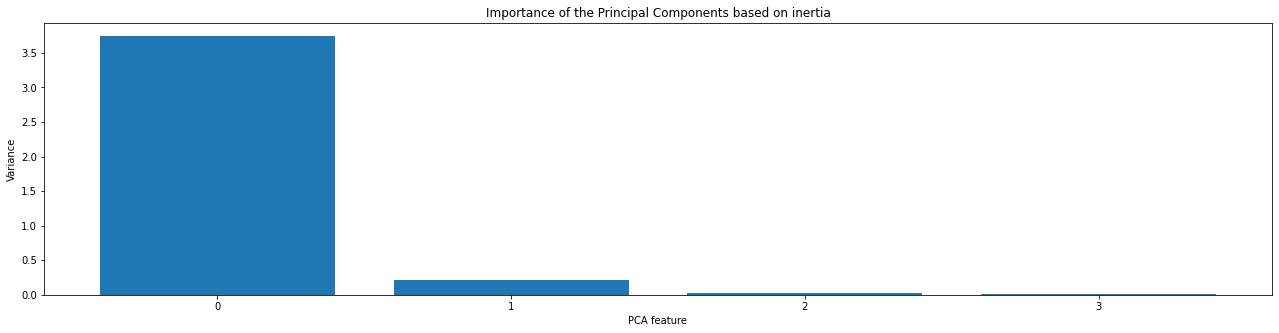

In [12]:
features = range(pca.n_components_)
plt.figure(figsize=(22, 5))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.title("Importance of the Principal Components based on inertia")
plt.show()

From the graph it can be seen that the first principal component is the most important according to the features extracted by PCA in the desired plot above. So as the next step, I will do PCA with 1 component which will be the training data to be used in modeling.

In [13]:
# Calculate PCA with one component
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(x)
data_train = pd.DataFrame(data = principalComponents, columns = ['pca'])
data_train.head()

,pca
0,-0.020221
1,-0.018942
2,-0.018949
3,-0.018987
4,-0.018810


In [15]:
dataset_model['pca']=pd.Series(data_train['pca'].values, index=dataset_model.index)
dataset_model.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,pca
date,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,-0.020221
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,-0.018942
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,-0.018949
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,-0.018987
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,-0.018810


# Base Model: Detect Outliers Using the Interquartile Range (IQR)

Anomalies can be defined as events outside the general data that can be represented by outliers in the data set. As a first step, I would like to apply basic statistical techniques to get the outliers present in this data set. Then, I will compare the results with the results from using the machine learning model.

In this method, suppose :
- 0 : normal
- 1 : anomaly

In [16]:
# Calculate outlier bounds for pca
q1_pca, q3_pca = dataset_model['pca'].quantile([0.25, 0.75])
iqr_pca = q3_pca - q1_pca
lower_pca = q1_pca - (1.5*iqr_pca)
upper_pca = q3_pca + (1.5*iqr_pca)

In [17]:
lower_pca, upper_pca

(-0.05419640775732662, 0.03429445537167657)

In [18]:
dataset_model['anomaly_pca_iqr'] = ((dataset_model['pca']>upper_pca) | (dataset_model['pca']<lower_pca)).astype('int')
dataset_model.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,pca,anomaly_pca_iqr
date,,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,-0.020221,0
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,-0.018942,0
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,-0.018949,0
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,-0.018987,0
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,-0.018810,0


In [19]:
dataset_model['anomaly_pca_iqr'].value_counts()

0    867
1    115
Name: anomaly_pca_iqr, dtype: int64

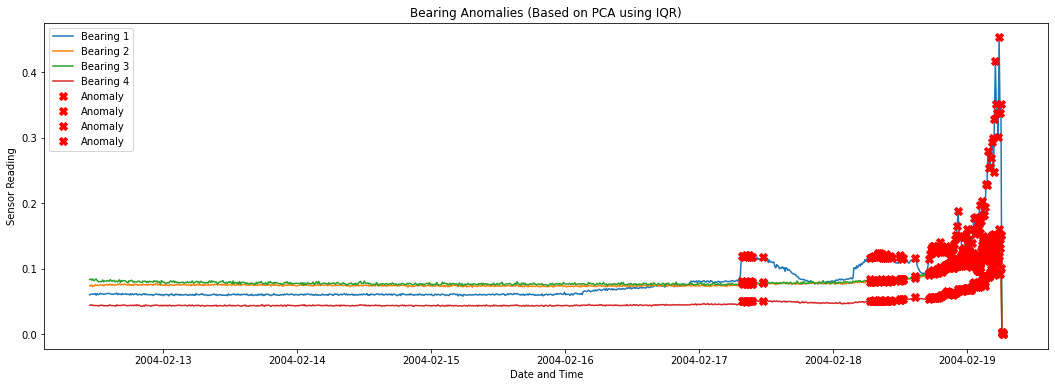

In [20]:
dataset_model['anomaly_pca_iqr'] = pd.Series(dataset_model['anomaly_pca_iqr'].values, index=dataset_model.index)
a = dataset_model.loc[dataset_model['anomaly_pca_iqr'] == 1] #anomaly
plt.figure(figsize=(18,6))
plt.plot(dataset_model[['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']], label=dataset_model.columns[:-2])
plt.plot(a[['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Bearing Anomalies (Based on PCA using IQR)')
plt.legend(loc='best')
plt.show()

Based on calculations using the IQR method using data from PCA. As seen above, the anomaly is detected right the first time all bearings value increases.

## Modeling
Import library K-Means and Elliptic Envelope Algorithm

In [22]:
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

Bulding Machine Learning Model using K-Means Algorithm

In this method, suppose :
- 0 : normal
- 1 : anomaly

In [23]:
km_model=KMeans(n_clusters=2, random_state=42)
dataset_km_model=dataset_model.drop(['pca','anomaly_pca_iqr'], axis=1)
km_model.fit(data_train)

KMeans(n_clusters=2, random_state=42)

In [24]:
dataset_km_model['anomaly']=km_model.predict(data_train)
dataset_km_model.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,anomaly
date,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,0
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,0
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,0
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,0
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,0


In [25]:
dataset_km_model['anomaly'].value_counts()

0    952
1     30
Name: anomaly, dtype: int64

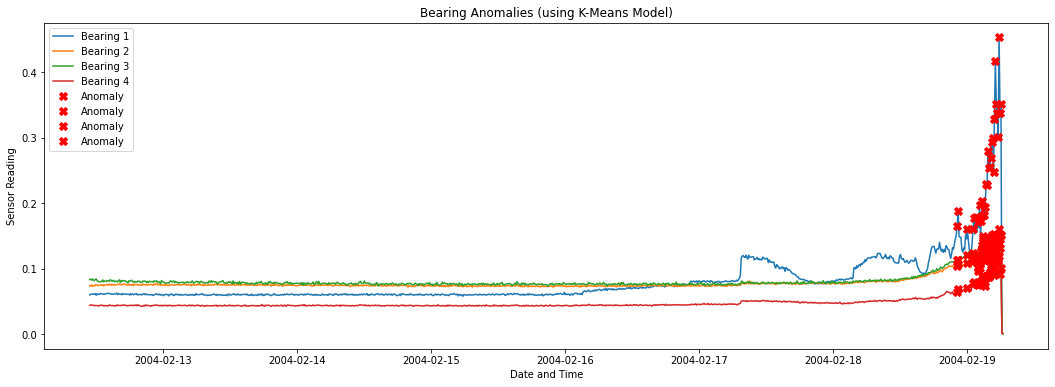

In [26]:
dataset_km_model['anomaly'] = pd.Series(dataset_km_model['anomaly'].values, index=dataset_km_model.index)
a = dataset_km_model.loc[dataset_km_model['anomaly'] == 1]
plt.figure(figsize=(18,6))
plt.plot(dataset_km_model[['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']], label=dataset_km_model.columns[:-1])
plt.plot(a[['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Bearing Anomalies (using K-Means Model)')
plt.legend(loc='best')
plt.show()

Bulding Machine Learning Model using Elliptic Envelope Algorithm

In this method, suppose :
- 1 : normal
- -1 : anomaly

In [27]:
ee_model=EllipticEnvelope()
dataset_ee_model=dataset_model.drop(['pca','anomaly_pca_iqr'], axis=1)
ee_model.fit(data_train)

EllipticEnvelope()

In [28]:
dataset_ee_model['anomaly']=ee_model.predict(data_train)
dataset_ee_model.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4,anomaly
date,,,,,
2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443,1
2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081,1
2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118,1
2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172,1
2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659,1


In [29]:
dataset_ee_model['anomaly'].value_counts()

 1    883
-1     99
Name: anomaly, dtype: int64

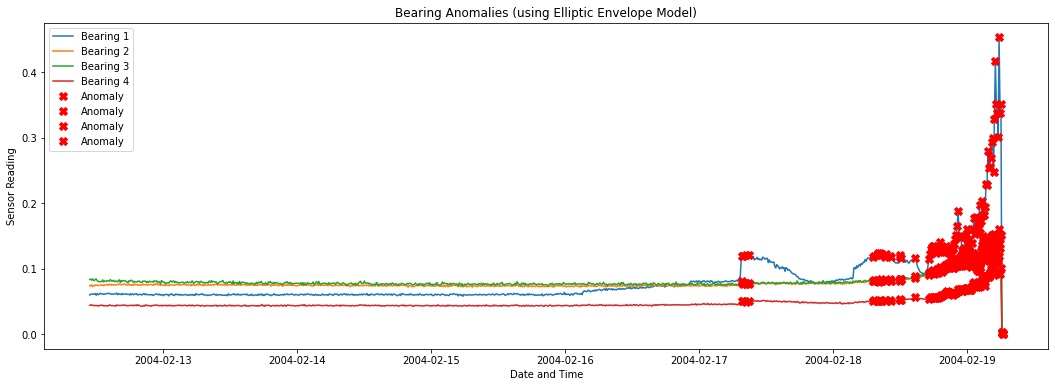

In [30]:
dataset_ee_model['anomaly'] = pd.Series(dataset_ee_model['anomaly'].values, index=dataset_ee_model.index)
a = dataset_ee_model.loc[dataset_ee_model['anomaly'] == -1]
plt.figure(figsize=(18,6))
plt.plot(dataset_ee_model[['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']], label=dataset_ee_model.columns[:-1])
plt.plot(a[['Bearing 1', 'Bearing 2', 'Bearing 3', 'Bearing 4']], linestyle='none', marker='X', color='red', markersize=8, label='Anomaly')
plt.xlabel('Date and Time')
plt.ylabel('Sensor Reading')
plt.title('Bearing Anomalies (using Elliptic Envelope Model)')
plt.legend(loc='best')
plt.show()

## Model Evaluation

Based on the results of the two models, both models detect many similar anomalies. However, judging from the graph obtained above visually, it can be concluded that the model from Elliptic Envelope algorithm produces a graph that is more similar to the graph obtained using the IQR method than that produced by the model from K-Means algorithm. 

The number of anomalies detected by the method and the model of each algorithm

|  | IQR | K-Means | Elliptic Envelope |
| --- | --- | --- | --- |
| Normal Detected | 867 | 952 | 883 |
| Anomaly Detected | 115 | 30 | 99 |


Then, the following comparison shows, similarly, that the Elliptic Envelope algorithm detects much more anomalies and has almost the same amount as that produced by the IQR method than K-Means algorithm.